# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
%matplotlib notebook

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_data.csv"



## Generate Cities List

* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

In [3]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# URL for GET requests to retrieve weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?" 

units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


In [11]:
# set up lists to hold reponse info
lat =[]
lng = []
max_temp =[]
humidity = []
clouds = []
wind = []
country = []
date = []
exist_city =[]


print("-"*30)
print("Beginning Data Retrieval")
print("-"*30)

# To keep format of printed Log as suggested
set_num=1  # counter for Set number
i=1        # counter for record number

# Loop through the list of cities and perform a request for each of the cities
for city in cities:

    if i==50:
        set_num +=1
        i=1
    try:
        # Create search query, make request and store in json
        response = requests.get(query_url + city).json() 

        exist_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])


        # Include a print log of each city as it's being processed
        print(f"Processing Record {i} of Set {set_num} | {city}")

    except(KeyError, IndexError):
              print(f"City not found. Skipping...")
    i+=1
              
print("-"*30)
print("Data Retrieval Complete")
print("-"*30)

              

------------------------------
Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | freeport
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | asfi
Processing Record 6 of Set 1 | kahului
City not found. Skipping...
Processing Record 8 of Set 1 | guerrero negro
Processing Record 9 of Set 1 | agnibilekrou
Processing Record 10 of Set 1 | kavaratti
Processing Record 11 of Set 1 | haridwar
Processing Record 12 of Set 1 | narsaq
Processing Record 13 of Set 1 | dunedin
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | byron bay
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | kavieng
Processing Record 18 of Set 1 | cherskiy
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 22 of Set 1 | busselton
Processing Record 23 of Set 1 | pevek
Proc

Processing Record 8 of Set 5 | buluang
Processing Record 9 of Set 5 | mar del plata
Processing Record 10 of Set 5 | marawi
Processing Record 11 of Set 5 | moron
Processing Record 12 of Set 5 | grand gaube
Processing Record 13 of Set 5 | guane
Processing Record 14 of Set 5 | the valley
City not found. Skipping...
Processing Record 16 of Set 5 | kalangala
Processing Record 17 of Set 5 | lucca
Processing Record 18 of Set 5 | naze
Processing Record 19 of Set 5 | chunhuhub
Processing Record 20 of Set 5 | abalak
Processing Record 21 of Set 5 | hun
Processing Record 22 of Set 5 | manavalakurichi
Processing Record 23 of Set 5 | rostovka
City not found. Skipping...
Processing Record 25 of Set 5 | cabo san lucas
City not found. Skipping...
Processing Record 27 of Set 5 | singaraja
City not found. Skipping...
Processing Record 29 of Set 5 | san juan
Processing Record 30 of Set 5 | saurimo
Processing Record 31 of Set 5 | taoudenni
City not found. Skipping...
Processing Record 33 of Set 5 | tuktoya

Processing Record 17 of Set 9 | caravelas
Processing Record 18 of Set 9 | kawalu
Processing Record 19 of Set 9 | castro
Processing Record 20 of Set 9 | labuhan
Processing Record 21 of Set 9 | hamilton
Processing Record 22 of Set 9 | nortelandia
Processing Record 23 of Set 9 | rudbar
Processing Record 24 of Set 9 | grand forks
Processing Record 25 of Set 9 | madinat sittah uktubar
Processing Record 26 of Set 9 | vestmannaeyjar
Processing Record 27 of Set 9 | mukhtolovo
Processing Record 28 of Set 9 | jalu
Processing Record 29 of Set 9 | comarapa
Processing Record 30 of Set 9 | havoysund
Processing Record 31 of Set 9 | yerbogachen
Processing Record 32 of Set 9 | fernley
Processing Record 33 of Set 9 | mitsamiouli
Processing Record 34 of Set 9 | isla mujeres
Processing Record 35 of Set 9 | phan thiet
Processing Record 36 of Set 9 | nacogdoches
Processing Record 37 of Set 9 | puro
Processing Record 38 of Set 9 | agutaya
Processing Record 39 of Set 9 | saint-pierre
Processing Record 40 of S

Processing Record 19 of Set 13 | hambantota
Processing Record 20 of Set 13 | santa rosa
Processing Record 21 of Set 13 | praia
Processing Record 22 of Set 13 | kawhia
Processing Record 23 of Set 13 | alekseyevsk
Processing Record 24 of Set 13 | kidal
Processing Record 25 of Set 13 | talnakh
Processing Record 26 of Set 13 | komsomolskiy
Processing Record 27 of Set 13 | magadan
Processing Record 28 of Set 13 | palauig
Processing Record 29 of Set 13 | jiaohe
Processing Record 30 of Set 13 | andenes
Processing Record 31 of Set 13 | iguai
Processing Record 32 of Set 13 | manzhouli
Processing Record 33 of Set 13 | thomasville
Processing Record 34 of Set 13 | poum
Processing Record 35 of Set 13 | xushan
Processing Record 36 of Set 13 | prince rupert
Processing Record 37 of Set 13 | langreo
Processing Record 38 of Set 13 | meulaboh
Processing Record 39 of Set 13 | domoni
Processing Record 40 of Set 13 | santarem
City not found. Skipping...
Processing Record 42 of Set 13 | kitimat
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# Create a Dataframe from received data
weather_dict = {
    "City": exist_city, 
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Counrty": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Counrty,Date
0,Freeport,40.6576,-73.5832,36.00,55,90,10.36,US,1611794383
1,Jamestown,42.0970,-79.2353,21.99,93,90,4.32,US,1611794580
2,Qaanaaq,77.4840,-69.3632,-14.75,65,0,9.57,GL,1611794580
3,Albany,42.6001,-73.9662,28.99,59,99,3.00,US,1611794348
4,Safi,32.2994,-9.2372,62.69,85,0,12.55,MA,1611794581


In [51]:
# Remove missing values if exist
weather_data=weather_data.dropna()

# Export the city data into a .csv file
weather_data.to_csv(output_data_file, header=True)


In [19]:
# Generate descriptive statistics
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.00000,586.000000,586.000000,586.000000,5.860000e+02
mean,18.707494,19.677512,49.73058,75.315700,57.960751,8.208140,1.611795e+09
std,32.923536,90.750098,32.16066,17.487314,41.370374,6.151765,8.351442e+01
min,-54.800000,-175.200000,-51.88000,11.000000,0.000000,0.180000,1.611794e+09
25%,-8.109750,-60.197275,30.05000,67.000000,5.250000,3.440000,1.611795e+09
50%,21.395800,24.173750,60.82000,78.500000,75.000000,6.645000,1.611795e+09
75%,46.420825,103.635475,75.62250,88.000000,99.000000,11.500000,1.611795e+09
max,78.218600,178.416700,99.25000,100.000000,100.000000,37.000000,1.611795e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
# Get the indices of cities that have humidity over 100%
humidity_outliers = weather_data[weather_data['Humidity'] > 100].index
humidity_outliers

Int64Index([], dtype='int64')

In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

if weather_data['Humidity'].max() > 100:
    clean_city_data = weather_data.drop(humidity_outliers, inplace=False)
else:
    clean_city_data = weather_data
    

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


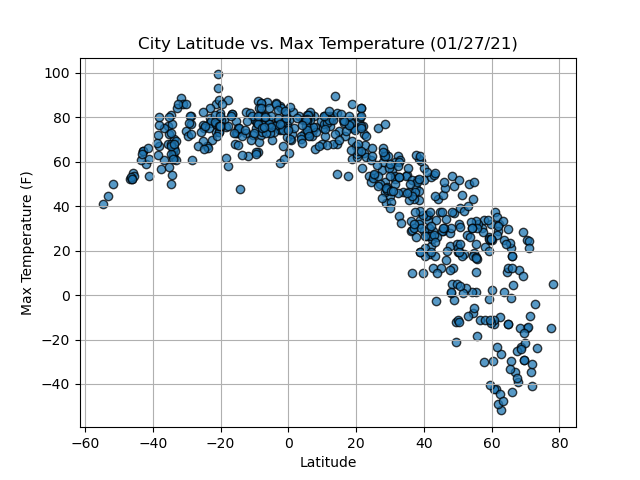

In [70]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Max Temp']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title("City Latitude vs. Max Temperature (01/27/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/MaxTempLat.png")

plt.show()

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


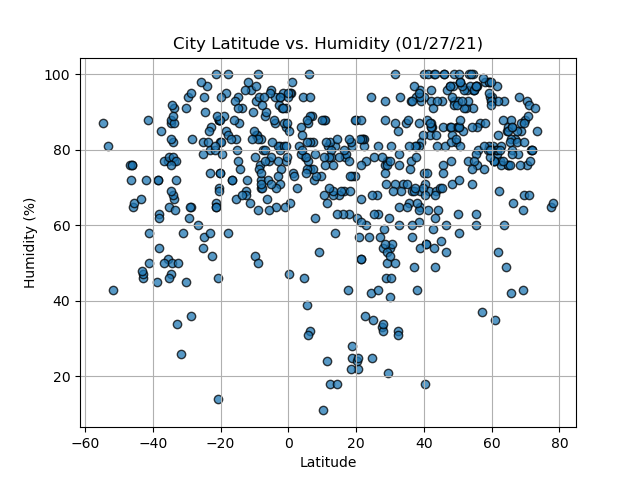

In [57]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Humidity']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title("City Latitude vs. Humidity (01/27/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/HumidLat.png")

plt.show()

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


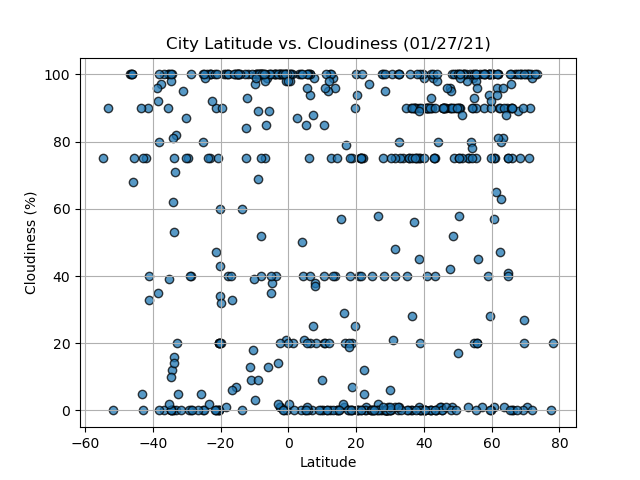

In [58]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title("City Latitude vs. Cloudiness (01/27/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/CloudsLat.png")

plt.show()

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


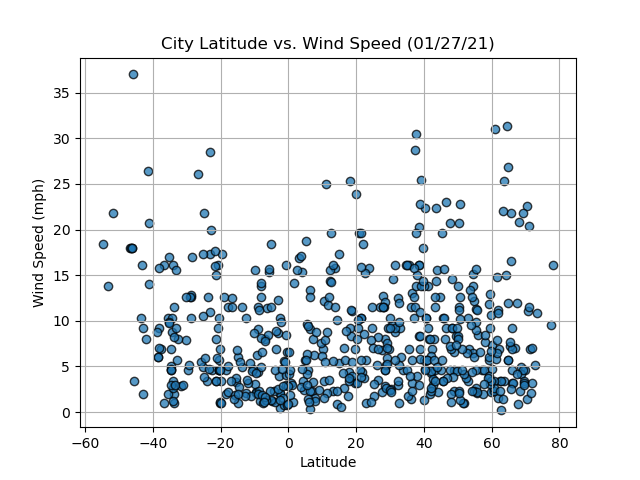

In [59]:
# Create a Scatter Plot for temperature vs latitude
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']

fig1, ax1 =plt.subplots()

plt.scatter(x,y, edgecolors="black", alpha=0.75)

# set axis labels and title
plt.title("City Latitude vs. Wind Speed (01/27/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# add Grid
plt.grid()

# Save the figure
plt.savefig("../Images/WindLat.png")

plt.show()

## Linear Regression

* Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

In [60]:
# Create Northern Hemisphere dataframe (greater than or equal to 0 degrees latitude)
north_hemisph = clean_city_data[(clean_city_data['Lat'] >= 0)]
north_hemisph.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Counrty,Date
0,Freeport,40.6576,-73.5832,36.00,55,90,10.36,US,1611794383
1,Jamestown,42.0970,-79.2353,21.99,93,90,4.32,US,1611794580
2,Qaanaaq,77.4840,-69.3632,-14.75,65,0,9.57,GL,1611794580
3,Albany,42.6001,-73.9662,28.99,59,99,3.00,US,1611794348
4,Safi,32.2994,-9.2372,62.69,85,0,12.55,MA,1611794581


In [61]:
# Create Southern Hemisphere dataframe (less than 0 degrees latitude)
south_hemisph = clean_city_data[(clean_city_data['Lat'] < 0)]
south_hemisph.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Counrty,Date
11,Dunedin,-45.8742,170.5036,55.00,65,68,37.00,NZ,1611794582
12,Ushuaia,-54.8000,-68.3000,41.00,87,75,18.41,AR,1611794311
13,Byron Bay,-28.6500,153.6167,80.60,65,40,12.66,AU,1611794583
14,Rikitea,-23.1203,-134.9692,79.72,74,100,10.98,PF,1611794583
15,Kavieng,-2.5744,150.7967,85.14,71,100,10.36,PG,1611794536


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


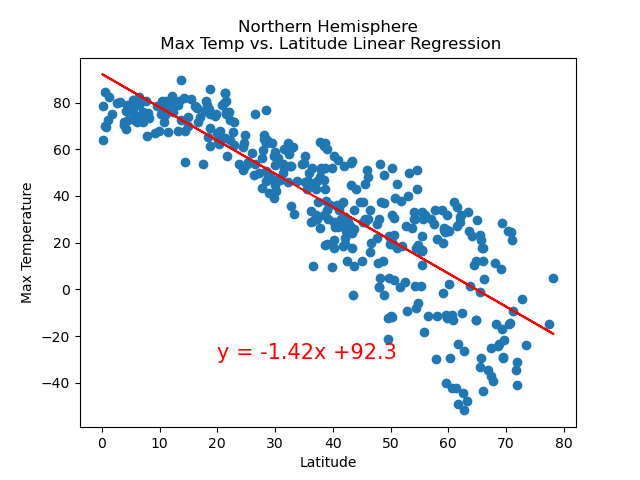

The r-value is: 0.7421841529566214


In [62]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Max Temp']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,-30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_MaxTempLat_regr.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


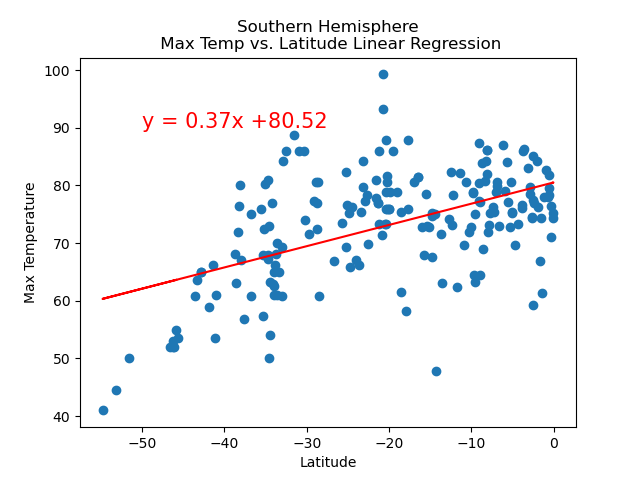

The r-value is: 0.27573523690802204


In [63]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Max Temp']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_MaxTempLat_regr.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


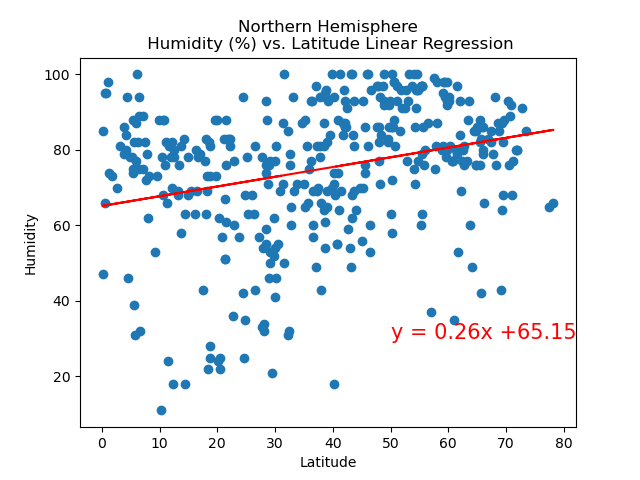

The r-value is: 0.07878159899105082


In [64]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Humidity']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_HumidLat_regr.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


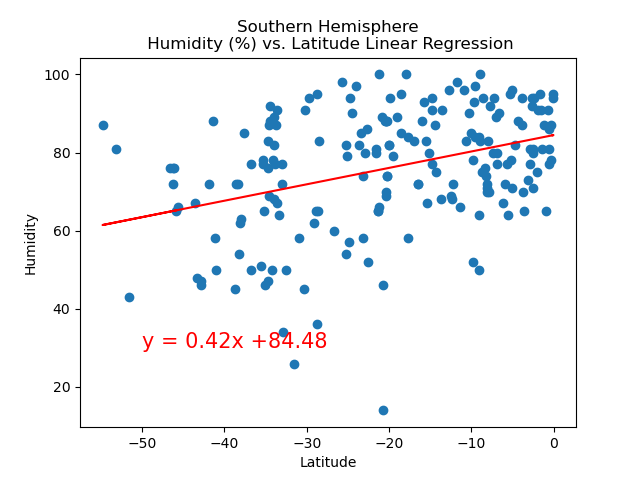

The r-value is: 0.13897023997554114


In [65]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Humidity']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_HumidLat_regr.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


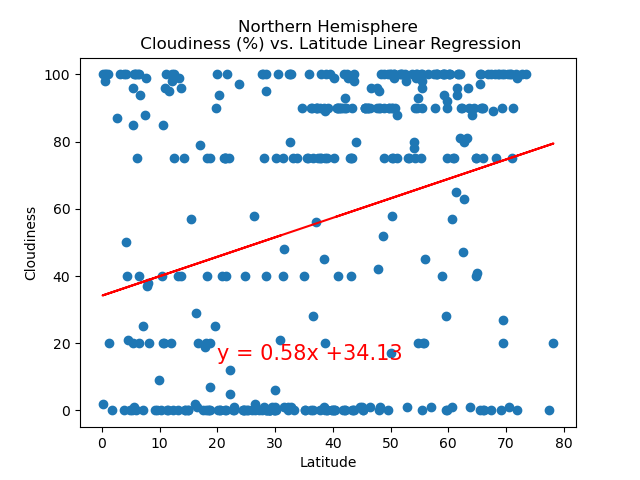

The r-value is: 0.07775607207075706


In [66]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Cloudiness']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_CloudsLat_regr.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


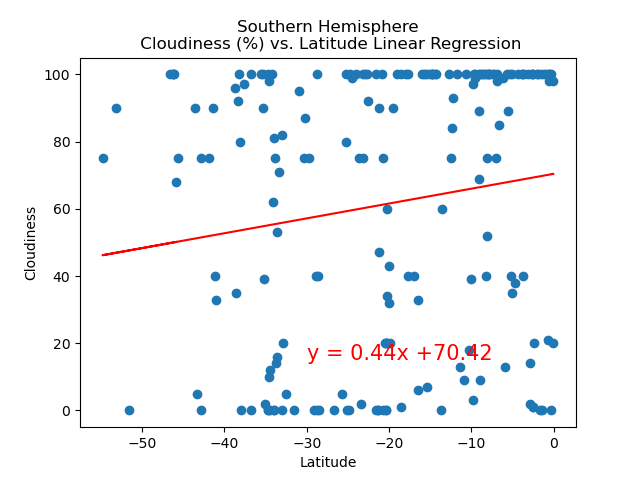

The r-value is: 0.022321888572025817


In [67]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Cloudiness']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_CloudsLat_regr.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


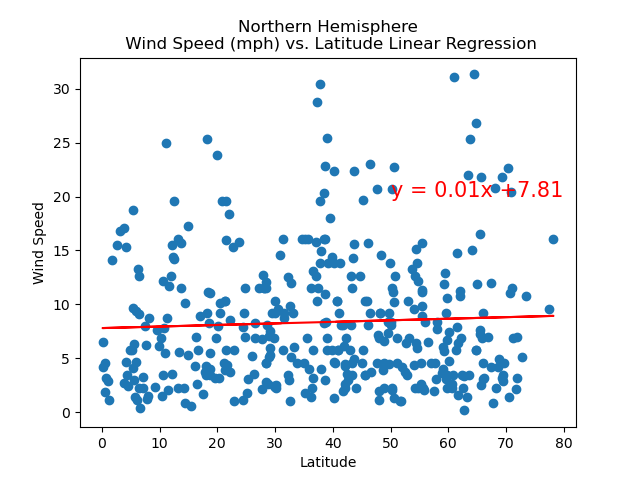

The r-value is: 0.0022530265282713824


In [68]:
fig1, ax1 =plt.subplots()

x_values = north_hemisph['Lat']
y_values = north_hemisph['Wind Speed']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere\n Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/NH_WindLat_regr.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


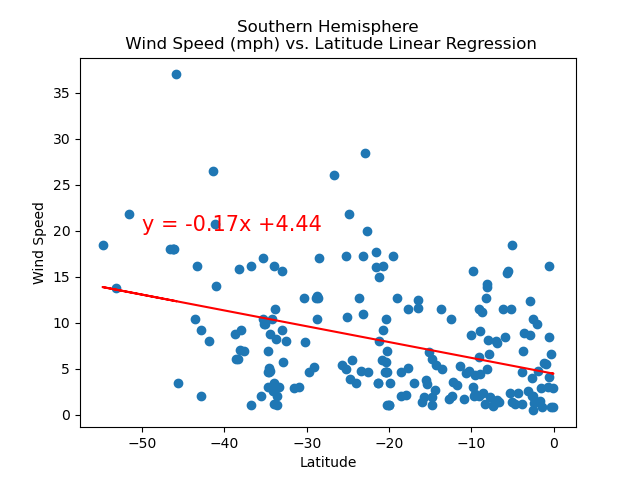

The r-value is: 0.14334695731318486


In [69]:
fig1, ax1 =plt.subplots()

x_values = south_hemisph['Lat']
y_values = south_hemisph['Wind Speed']


# Perform a linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Add the linear regression line on top of the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere\n Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/SH_WindLat_regr.png")

# Show plot
plt.show()